<h1 style="width:100%; height:30px;background-color: #FA8072; font-weight: bold; font-family:Times New Roman; color:#FFF5EE; font-size:140%; font-family:Monospace; text-align:center; border-radius:5px 5px;">Online Food Ordering</h1>

<div>
    <h3 style="font-weight: bold; font-family:Times New Roman">Description:</h3>
    <p  style="font-size: 16px;font-family:Times New Roman">his project is based on the analysis of a dataset of online food orders, with the aim of exploring the relationships between demographic factors, location and customer behavior.</p>
</div>
<nav>
    <h3 style="font-weight: bold; font-family:Times New Roman">Attributes:</h3>
    <ul style="font-size: 16px;font-family:Times New Roman">
        <li><strong>Age:</strong> Age of the customer.</li>
        <li><strong>Gender:</strong> Gender of the customer.</li>
        <li><strong>Marital Status:</strong> Marital status of the customer.</li>
        <li><strong>Occupation:</strong> Occupation of the customer.</li>
        <li><strong>Monthly Income:</strong> Monthly income of the customer.</li>
        <li><strong>Educational Qualifications:</strong> Educational qualifications of the customer.</li>
        <li><strong>Family Size:</strong> Number of individuals in the customer's family.</li>
        <li><strong>Latitude:</strong> Latitude of the customer's location.</li>
        <li><strong>Longitude:</strong> Longitude of the customer's location.</li>
        <li><strong>Output:</strong> Current status of the order (e.g., pending, confirmed, delivered).</li>
        <li><strong>Feedback:</strong> Feedback provided by the customer after receiving the order.</li>
    </ul>
</nav>
<div style="font-family:Times New Roman">
    <h3 style="font-weight: bold; font-family:Times New Roman">Purpose:</h3>
    <p  style="font-size: 16px;font-family:Times New Roman">Explore whether there are purchasing relationships for the food sold, understanding the influence of location, age, gender, family size and occupation of the customer on the purchase of the product</p>
</div>

<h1 style="width:100%; height:30px;background-color: #FA8072; font-weight: bold; font-family:Times New Roman; color:#FFF5EE; font-size:140%; font-family:Monospace; text-align:center; border-radius:5px 5px;">STEP 1 | Importing Data & Libraries</h1>

In [1]:
!pip install pandas
!pip install matplotlib
!pip install geopy
!pip install seaborn

In [2]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from IPython.display import display, HTML  # Displaying HTML output in Jupyter notebooks
import warnings  # Suppress warnings
from colorama import Fore, Style  # Colored terminal text

<h1 style="width:100%; height:30px;background-color: #FA8072; font-weight: bold; font-family:Times New Roman; color:#FFF5EE; font-size:140%; font-family:Monospace; text-align:center; border-radius:5px 5px;">STEP 2 | Loading Data</h1>

In [3]:
df_Foods = pd.read_csv('onlinefoods.csv')

<h1 style="width:100%; height:30px;background-color: #FA8072; font-weight: bold; font-family:Times New Roman; color:#FFF5EE; font-size:140%; font-family:Monospace; text-align:center; border-radius:5px 5px;">Step 3 | Data Overview</h1>

In [4]:
print("===================================================================================")
print("TOP 5 in dataset")

TOP 5 in dataset


In [5]:
df_Foods.head(5)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [6]:
# df_Foods.drop(['Unnamed: 12'], index=1,inplace=True)

In [7]:

print("===================================================================================")
print("COLUMN REMOVED: Unnamed: 12")
print("===================================================================================")

COLUMN REMOVED: Unnamed: 12


In [8]:
print("===================================================================================")
print("Information columns")
df_Foods.info()
print("===================================================================================")
print("THERE ARE NO NULL VALUES")
print("===================================================================================")


Information columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), 

In [9]:
print("======================================Describe columns=============================================")

======================================Describe columns=============================================


In [10]:
df_Foods.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [11]:
print("===================================================================================")
print("Duplicates rows found:", df_Foods.duplicated().sum())
print("===================================================================================")

Duplicates rows found: 103


In [12]:
print("===================================================================================")
print("Number of rows and columns:", df_Foods.shape)
print("===================================================================================")

Number of rows and columns: (388, 13)


In [13]:
def unique_values(train_dataset):
    df_UniqueValues = pd.DataFrame({
        'Name': train_dataset.columns,
        'Type': [train_dataset[col].dtype for col in train_dataset.columns],
        'Unique Values': [', '.join(map(str, train_dataset[col].unique()[0:7])) for col in train_dataset.columns]
    })
    display(df_UniqueValues)

print("===================================================================================")
print("Unique Values in Dataset")
unique_values(df_Foods)
print("===================================================================================")

Unique Values in Dataset


,Name,Type,Unique Values
0,Age,int64,"20, 24, 22, 27, 23, 21, 28"
1,Gender,object,"Female, Male"
2,Marital Status,object,"Single, Married, Prefer not to say"
3,Occupation,object,"Student, Employee, Self Employeed, House wife"
4,Monthly Income,object,"No Income, Below Rs.10000, More than 50000, 10..."
5,Educational Qualifications,object,"Post Graduate, Graduate, Ph.D, Uneducated, School"
6,Family size,int64,"4, 3, 6, 2, 5, 1"
7,latitude,float64,"12.9766, 12.977, 12.9551, 12.9473, 12.985, 12...."
8,longitude,float64,"77.5993, 77.5773, 77.6593, 77.5616, 77.5533, 7..."
9,Pin code,int64,"560001, 560009, 560017, 560019, 560010, 560103..."


<h1 style="width:100%; height:30px;background-color: #FA8072; font-weight: bold; font-family:Times New Roman; color:#FFF5EE; font-size:140%; font-family:Monospace; text-align:center; border-radius:5px 5px;">Step 4 | Feature Engineering</h1>

In [14]:
# Function to get a adresss based on latitude and longitude
def get_county_name(latitude, longitude):
    # Inicialized geocoder
    geolocator = Nominatim(user_agent="Online Food Order")
    # Concatenates latitude and longitude into a string in the format "latitude, longitude"
    location = f"{latitude}, {longitude}"
    # Use the geocoder to obtain the address
    address = geolocator.reverse(location)
    # Checks if the address was found
    if address:
        # Extracts the city name from the 'address' subdictionary
        county = address.raw['address'].get('county', '')  # If 'city' does not exist, returns an empty string
        return county
    else:
        return None

# Apply the function to the DataFrame to obtain city names
df_Foods['county'] = df_Foods.apply(lambda row: get_county_name(row['latitude'], row['longitude']), axis=1)

In [15]:
print("===================================================================================")
print("County column created based on latitude and longitude: count")
print("===================================================================================")

County column created based on latitude and longitude: count


<h1 style="width:100%; height:30px;background-color: #FA8072; font-weight: bold; font-family:Times New Roman; color:#FFF5EE; font-size:140%; font-family:Monospace; text-align:center; border-radius:5px 5px;">Step 5 | EDA Analysis</h1>

In [16]:
def standardized_distribution(column_name, dataframe):
    ValueCounts = dataframe[column_name].value_counts()
    
    fig, (ax1 , ax2) = plt.subplots(1, 2, figsize=(15,5))

    palette_colors={'Female': 'pink', 'Male': 'lightblue'}
#===========================================================================================================================
    # Bar chart
    sns.barplot(x=ValueCounts.index, y=ValueCounts.values, ax=ax1, palette=palette_colors)
    ax1.set_title(f'Distribution by {column_name}', fontsize=14, fontweight='bold')
    ax1.set_xlabel(column_name)
    ax1.set_ylabel('Total')
    # fig.patch.set_visible(False)
     # Values Text (Bar chart)
    for p in ax1.patches:
        ax1.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
                fontsize=12, color='black', ha='center', va='bottom')
        
    sns.despine(ax=ax1)
#===========================================================================================================================
    # Pie Chart
    wedges, texts, autotexts = ax2.pie(ValueCounts.values, labels=ValueCounts.index, autopct='%1.1f%%', startangle=90, colors=[palette_colors[key] for key in ValueCounts.index])
    ax2.set_title(f'Distribution by {column_name}', fontsize=14, fontweight='bold')

    # Centralizar os labels dentro das fatias do gráfico de pizza
    for autotext, wedge in zip(autotexts, wedges):
        ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw = dict(arrowprops=dict(arrowstyle="-", color="black", lw=0.5, connectionstyle=connectionstyle),
                  xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                  horizontalalignment=horizontalalignment, verticalalignment="center")
        ax2.annotate(autotext.get_text(), xy=(0, 0), xycoords='data', **kw)

    plt.tight_layout()
    plt.show()


C:\Users\pichau\AppData\Local\Temp\ipykernel_26280\2609331569.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ValueCounts.index, y=ValueCounts.values, ax=ax1, palette=palette_colors)


TypeError: matplotlib.axes._axes.Axes.annotate() got multiple values for keyword argument 'xy'

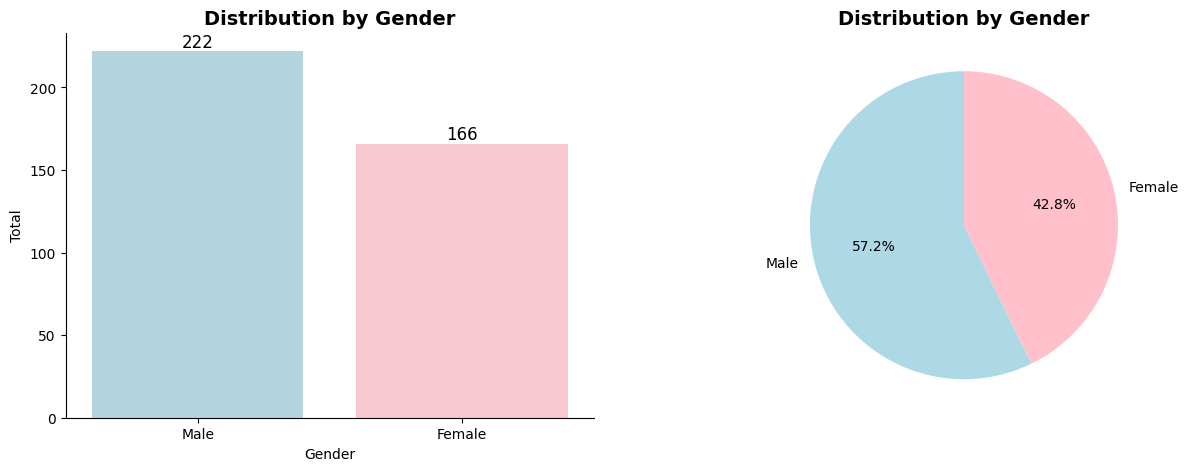

In [17]:
standardized_distribution('Gender', df_Foods)

In [28]:
def byGender(column_name, dataframe):
    
    ValueCounts =  dataframe[column_name].value_counts()
    ValueCounts = ValueCounts.sort_values(ascending=True)

    ax1 = plt.subplots(1, 2, figsize=(15,4))
    palette_colors = {'Male': 'lightblue', 'Female': 'pink'}
#===========================================================================================================================
    # Bar chart
    ax = sns.countplot(x=column_name, hue='Gender', data=dataframe, palette=palette_colors)

    plt.title(f'{column_name} by Gender', fontsize=14, fontweight='bold')
    plt.xlabel(f'{column_name}')
    plt.ylabel('Total')
    
     # Values Text (Bar chart)
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
                fontsize=12, color='black', ha='center', va='bottom')
        
    sns.despine(ax=ax)
    plt.tight_layout()
    plt.show()

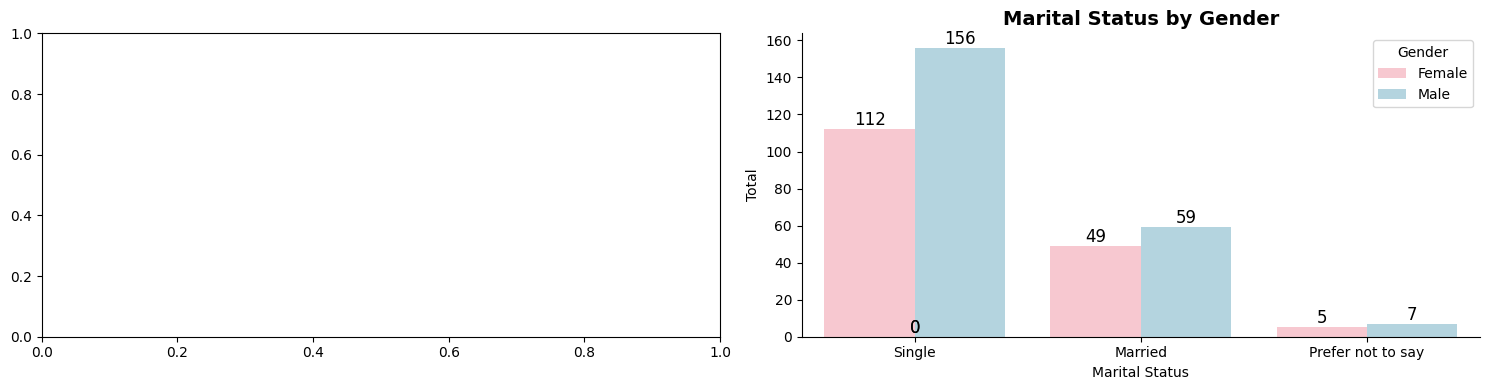

In [29]:
byGender('Marital Status', df_Foods)

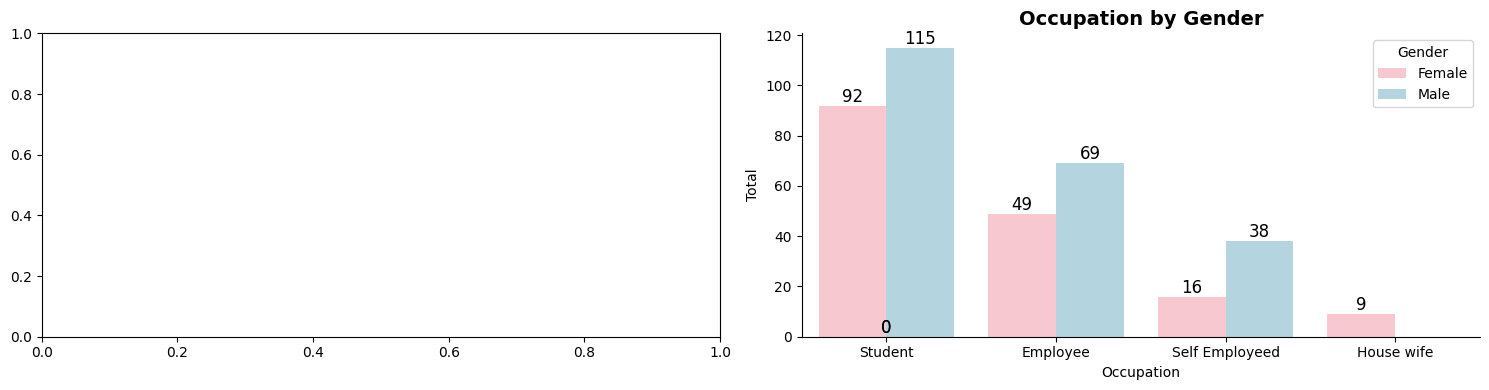

In [30]:
byGender('Occupation', df_Foods)

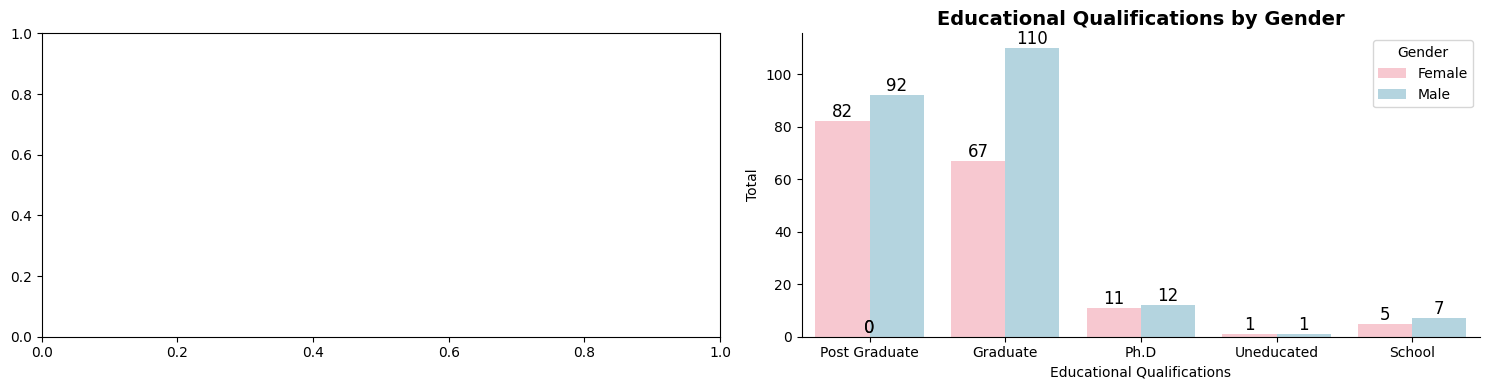

In [31]:
byGender('Educational Qualifications', df_Foods)

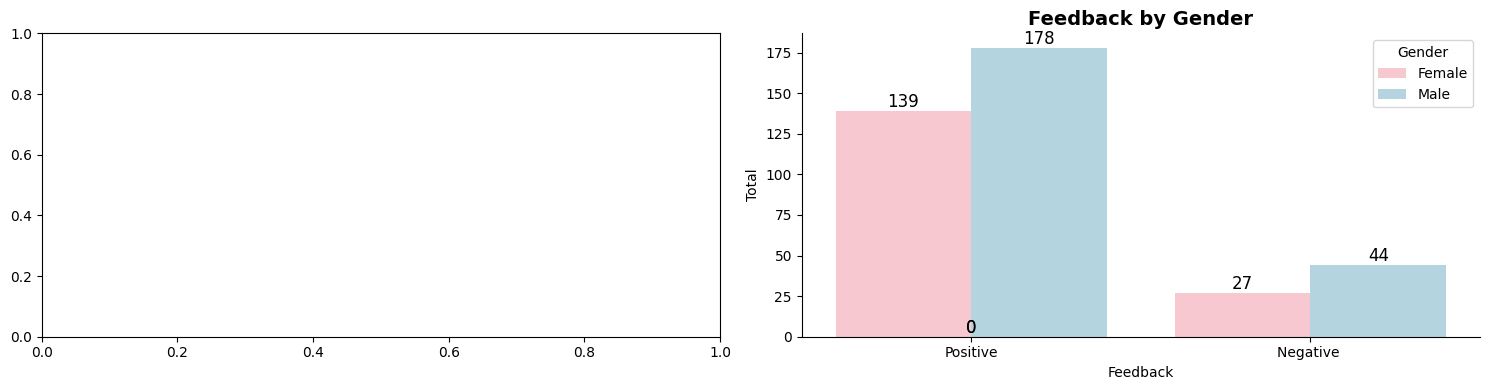

In [32]:
byGender('Feedback', df_Foods)

In [ ]:
df_Foods.head(1)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12,county
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes,Bangalore North


<h1 style="width:100%; height:30px;background-color: #FA8072; font-weight: bold; font-family:Times New Roman; color:#FFF5EE; font-size:140%; font-family:Monospace; text-align:center; border-radius:5px 5px;">Step 6 | Outlier Dedection</h1>

# Step 7 | Numerical Feature Distribution

# Step 7.1 | Normalization

# Step 8 | Correlation Analysis

# Step 9 | Encoding

# Step 10 | Model Building

# Base Classifier

# Fitting Classifier

# Evaluating Classifier

# Storing Reults in DF and Visualizing the Results